#     Applying Machine Learning (ML) bioinformatic best practices to the publicly available Wisconsin Diagnostic Breast Cancer (WDBC)  
## by:  Taiyuan Zhang

# 1 Background

### Background on WDBC dataset
The WDBC dataset created by [Dr. Wolberg](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29), et al.  contains 30 features computed for 569 unique instances from a digitized image of a fine needle aspirate (FNA) of a breast mass.  The total attributes totals at 32 because of the unique instance’s ID and the diagnosis.  They describe the characteristics of the cell nuclei present in the image.  
#### Here is a quick summary of the attributes as described at the link above:
##### 1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)
##### Ten real-valued features are computed for each cell nucleus:
*	a) radius (mean of distances from center to points on the perimeter) 
*	b) texture (standard deviation of gray-scale values) 
*	c) perimeter 
*	d) area 
*	e) smoothness (local variation in radius lengths) 
*	f) compactness (perimeter^2 / area - 1.0) 
*	g) concavity (severity of concave portions of the contour) 
*	h) concave points (number of concave portions of the contour) 
*	i) symmetry 
*	j) fractal dimension ("coastline approximation" - 1)
 
 

# 2. Import Dataset

In [1]:
## Algorithms
#1
from sklearn.ensemble import GradientBoostingClassifier

#2
from sklearn.ensemble import RandomForestClassifier

#3
from sklearn.svm import SVC

#4
from sklearn.ensemble import ExtraTreesClassifier

#5
from sklearn.linear_model import LogisticRegression

#6
from sklearn.neural_network import MLPClassifier

#7
from sklearn.neighbors import KNeighborsClassifier


## Sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc #plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Pandas
import pandas as pd # data processing, CSV file I/O (e.i. pd.read_csv)

## Numpy
import numpy as np

## Misc
import warnings
import os # Get Current Directory
import joblib
from time import time
from scipy import stats
import itertools
import subprocess

In [2]:
warnings.filterwarnings("ignore")
pd.set_option('mode.chained_assignment', None)

In [3]:
currentDirectory=os.getcwd()
print(currentDirectory)

def folder_path(path):
    try:
        os.mkdir(path)
    except OSError:
        print ("Creation of the directory %s failed" % path)
        return(path)
    else:
        print ("Successfully created the directory %s " % path)
        return(path)
    return(path)

c:\Users\张泰源\Desktop\学习\大四数学\ml\CW 2023\Taiyuan Zhang_CW_ML_20318174


In [4]:
# OUTPUTS: Folder for storing OUTPUTS
OUTPUT_path=folder_path(currentDirectory+'/Outputs')

# Models: Folder for storing models
models_path=folder_path(OUTPUT_path+'/Models')
# Figures: Folder for storing figures
figures_path=folder_path(OUTPUT_path+'/Figures')

Creation of the directory c:\Users\张泰源\Desktop\学习\大四数学\ml\CW 2023\Taiyuan Zhang_CW_ML_20318174/Outputs failed
Creation of the directory c:\Users\张泰源\Desktop\学习\大四数学\ml\CW 2023\Taiyuan Zhang_CW_ML_20318174/Outputs/Models failed
Creation of the directory c:\Users\张泰源\Desktop\学习\大四数学\ml\CW 2023\Taiyuan Zhang_CW_ML_20318174/Outputs/Figures failed


In [45]:
#Task 1
import numpy as np
import pandas as pd

# Read the data file
data_file = 'Data for ML CW.txt'
data = np.genfromtxt(data_file, delimiter=',', dtype=str)
print(data.shape)

# Define the column names for the features
selected_features = ['ID', 'Class',
                     'Mean Radius', 'Mean Texture', 'Mean Perimeter',
                     'Mean Area', 'Mean Smoothness', 'Mean Compactness',
                     'Mean Concavity', 'Mean Concave points', 'Mean Symmetry', 'Mean Fractal dimension',
                     'SE Radius', 'SE Texture', 'SE Perimeter',
                     'SE Area', 'SE Smoothness', 'SE Compactness',
                     'SE Concavity', 'SE Concave points', 'SE Symmetry', 'SE Fractal dimension',
                     'Worst Radius', 'Worst Texture', 'Worst Perimeter',
                     'Worst Area', 'Worst Smoothness', 'Worst Compactness',
                     'Worst Concavity', 'Worst Concave points', 'Worst Symmetry', 'Worst Fractal dimension']



# Create a DataFrame from the input data
df = pd.DataFrame(data, columns=selected_features)
#print(df)
data = df
# Separate class label and features
class_labels = df['Class']
features = df.drop(columns=['ID', 'Class'])

print(df.head(10))

# Print the class labels and features
print("Class Labels:")
#print(class_labels)
print("\nFeatures:")
#print(features)

(569, 32)
         ID Class Mean Radius Mean Texture Mean Perimeter Mean Area  \
0    842302     M       17.99        10.38          122.8      1001   
1    842517     M       20.57        17.77          132.9      1326   
2  84300903     M       19.69        21.25            130      1203   
3  84348301     M       11.42        20.38          77.58     386.1   
4  84358402     M       20.29        14.34          135.1      1297   
5    843786     M       12.45         15.7          82.57     477.1   
6    844359     M       18.25        19.98          119.6      1040   
7  84458202     M       13.71        20.83           90.2     577.9   
8    844981     M          13        21.82           87.5     519.8   
9  84501001     M       12.46        24.04          83.97     475.9   

  Mean Smoothness Mean Compactness Mean Concavity Mean Concave points  ...  \
0          0.1184           0.2776         0.3001              0.1471  ...   
1         0.08474          0.07864         0.0869   

# 3. Exploratory Data Analysis:<a class="anchor" id="Code_Objective_2"></a>

ID                         0
Class                      0
Mean Radius                0
Mean Texture               0
Mean Perimeter             0
Mean Area                  0
Mean Smoothness            0
Mean Compactness           0
Mean Concavity             0
Mean Concave points        0
Mean Symmetry              0
Mean Fractal dimension     0
SE Radius                  0
SE Texture                 0
SE Perimeter               0
SE Area                    0
SE Smoothness              0
SE Compactness             0
SE Concavity               0
SE Concave points          0
SE Symmetry                0
SE Fractal dimension       0
Worst Radius               0
Worst Texture              0
Worst Perimeter            0
Worst Area                 0
Worst Smoothness           0
Worst Compactness          0
Worst Concavity            0
Worst Concave points       0
Worst Symmetry             0
Worst Fractal dimension    0
dtype: int64


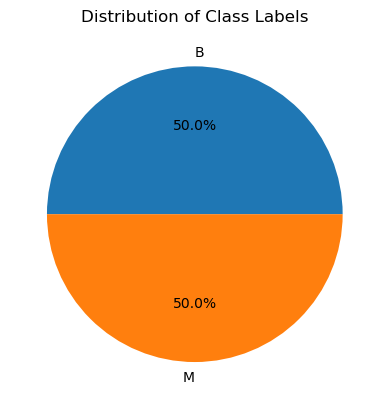

         ID  Class Mean Radius Mean Texture Mean Perimeter Mean Area  \
0    842302      1       17.99        10.38          122.8      1001   
1    842517      1       20.57        17.77          132.9      1326   
2  84300903      1       19.69        21.25            130      1203   
3  84348301      1       11.42        20.38          77.58     386.1   
4  84358402      1       20.29        14.34          135.1      1297   
5    843786      1       12.45         15.7          82.57     477.1   
6    844359      1       18.25        19.98          119.6      1040   
7  84458202      1       13.71        20.83           90.2     577.9   
8    844981      1          13        21.82           87.5     519.8   
9  84501001      1       12.46        24.04          83.97     475.9   

  Mean Smoothness Mean Compactness Mean Concavity Mean Concave points  ...  \
0          0.1184           0.2776         0.3001              0.1471  ...   
1         0.08474          0.07864         0.0869  

In [46]:
# Exploratory Data Analysis
# 1.Checking Null values
print(df.isnull().sum())

# 2. Distribution of M (malignant) or B (benign)
import matplotlib.pyplot as plt

# assume the class labels are stored in a list called 'class_labels'
class_labels = ['B', 'M']

# count the occurrences of each class label
label_counts = [class_labels.count('B'), class_labels.count('M')]

# create a pie plot using matplotlib
plt.pie(label_counts, labels=class_labels, autopct='%1.1f%%')

# add a title
plt.title('Distribution of Class Labels')

# display the plot
plt.show()

#3.  Convert Diagnosis for Cancer from Categorical Variable to Binary
Class_num={'B':0,'M':1}
df['Class']=df['Class'].map(Class_num)

# 4. # Drop Id: Obvious this might be tied to a certain individual that an algorithm might pick up on.
#df.drop(['ID'],axis=1,inplace=True) 

print(df.head(10))



A strong correlation is indicated by a Pearson Correlation Coefficient value near 1.  Therefore, when looking at the Heatmap, we want to see what correlates most with the first column, "Class."  It appears that the features of "concave points worst" [0.79] has the strongest correlation with "Class".  

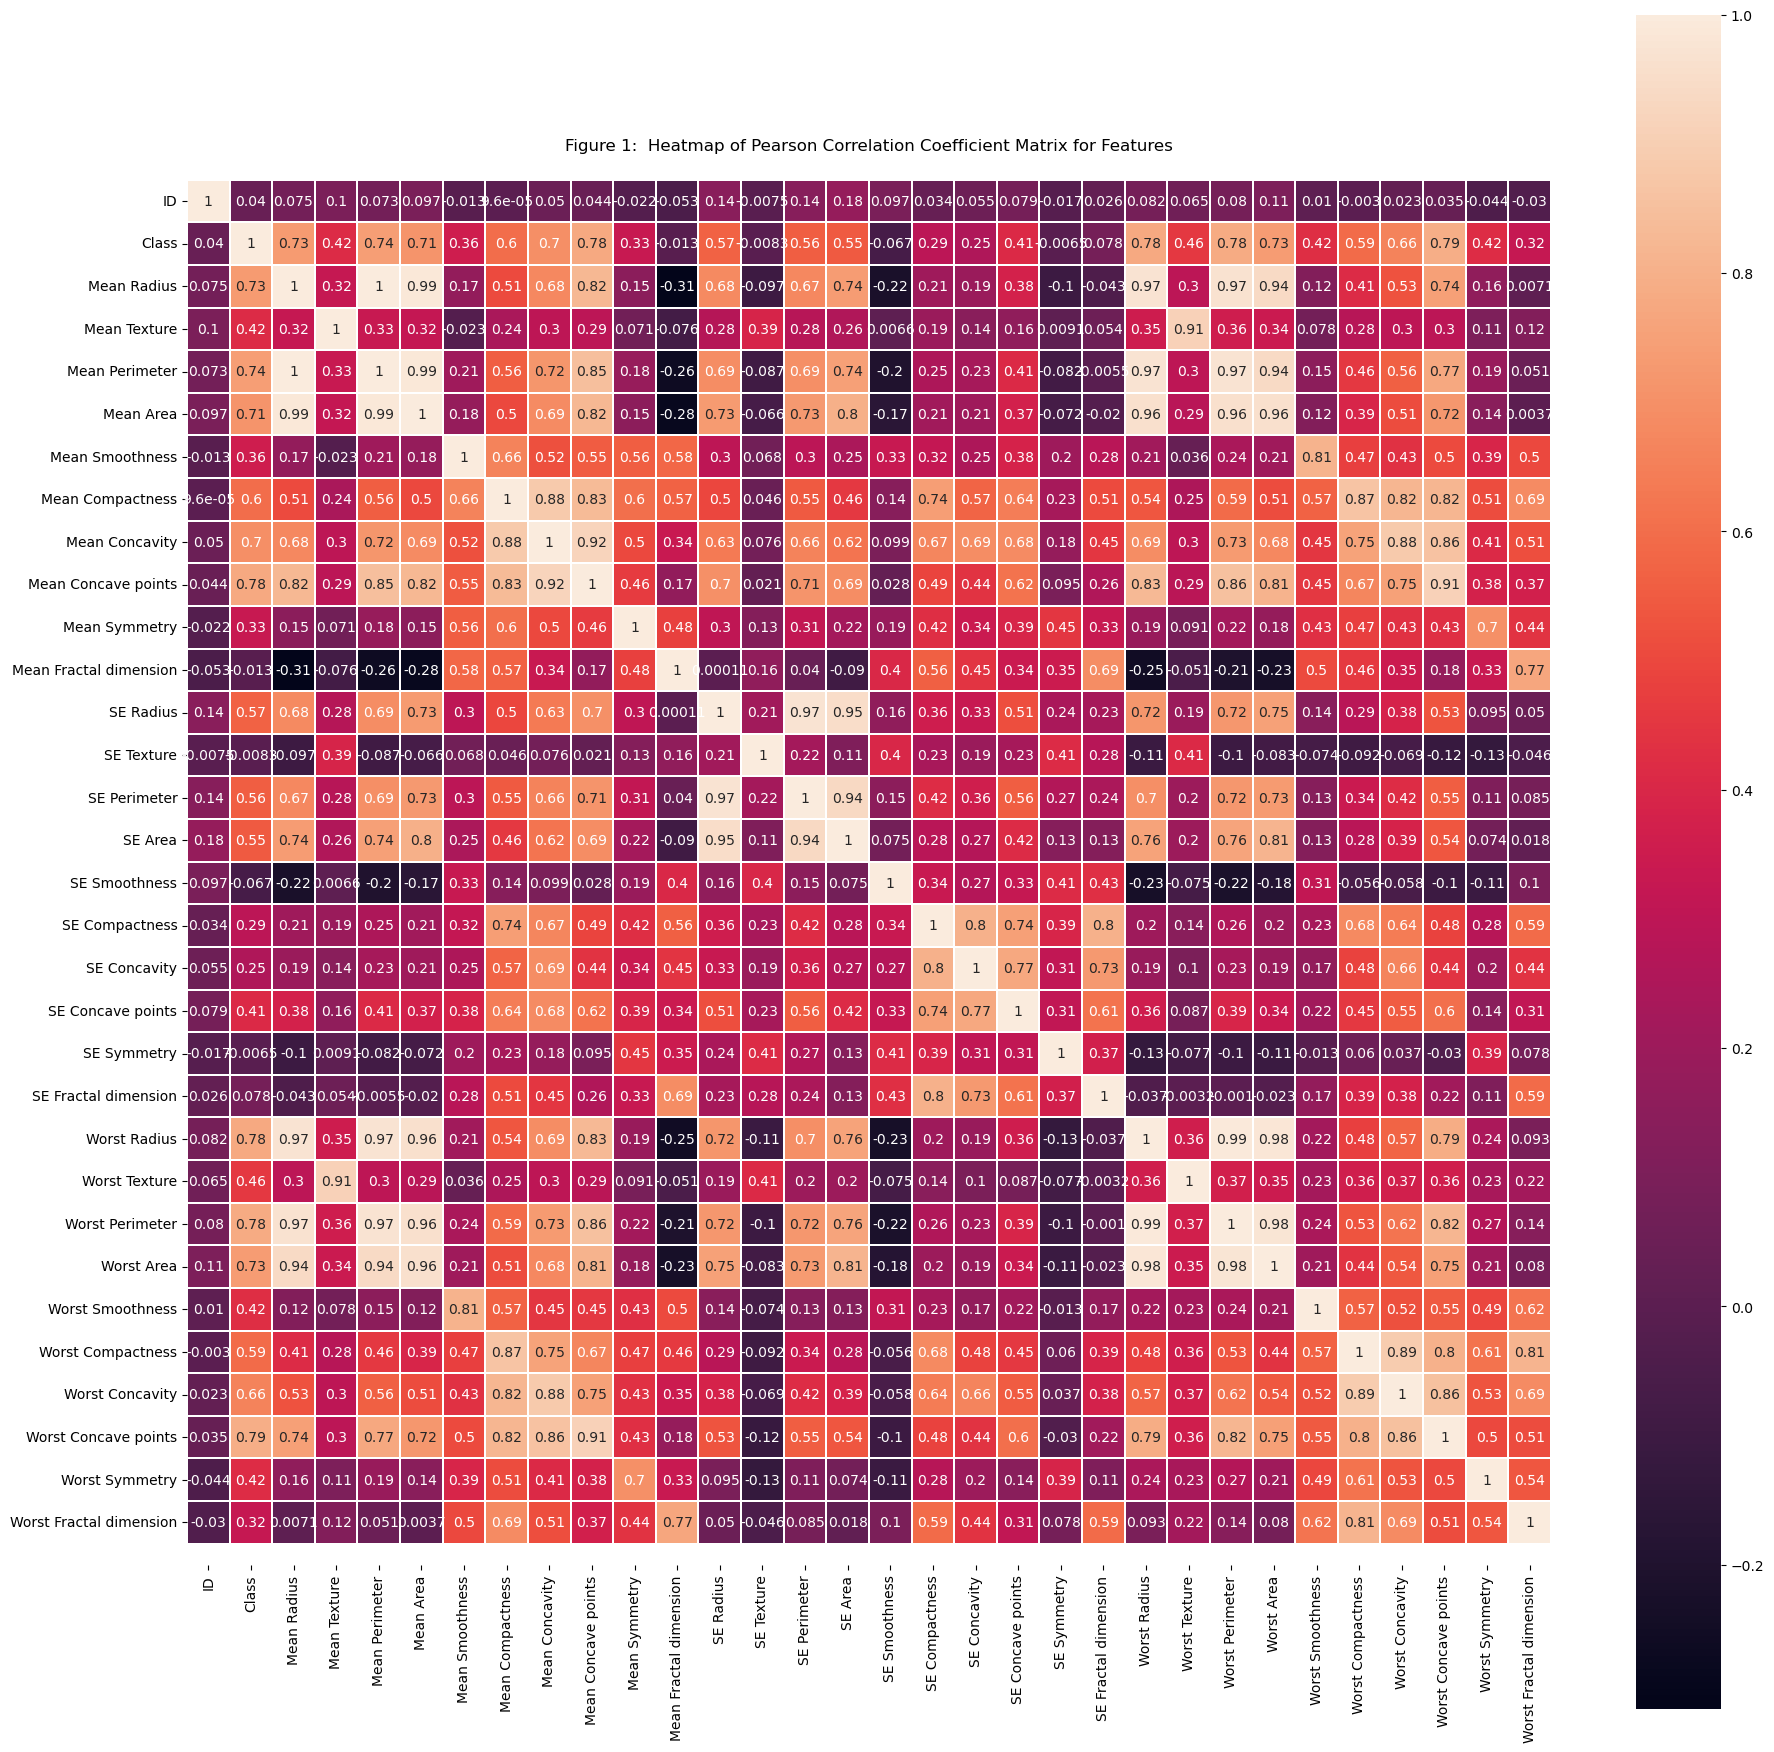

In [47]:
# Exploratory Data Analysis
#Heatmap with Pearson Correlation Coefficient  for Features
fix,ax = plt.subplots(figsize=(22,22))
heatmap_data = df
sns.heatmap(heatmap_data.corr(),vmax=1,linewidths=0.01,square=True,annot=True,linecolor="white")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
heatmap_title='Figure 1:  Heatmap of Pearson Correlation Coefficient Matrix for Features'
ax.set_title(heatmap_title)
heatmap_fig=os.path.join(figures_path,'Figure1.Heatmap.png')
plt.savefig(heatmap_fig,dpi=300,bbox_inches='tight')
plt.show()

Class_num={0:'B',1:'M'}
df['Class']=df['Class'].map(Class_num)

# 4.  Data Split <a class="anchor" id="Code_Objective_5"></a>  

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['ID', 'Class'], axis=1), df['Class'], test_size=169, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verify the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (400, 31)
Testing set shape: (169, 31)


## Task one
## 5.  Feature Enginnering: PCA <a class="anchor" id="Code_Objective_5"></a>  

In [9]:
from sklearn.decomposition import PCA

# Define the number of components for PCA
n_components = [5, 10, 15, 20]

# Apply PCA to the training data
for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    
    # Print the variance explained by each principal component
    print(f"Explained variance ratio (n_components={n}):")
    print(pca.explained_variance_ratio_)
    
    # Apply the same transformation to the testing data
    X_test_pca = pca.transform(X_test)

    # Use the transformed data for training and testing
    


Explained variance ratio (n_components=5):
[0.43076465 0.19888237 0.09699835 0.06527064 0.05329384]
Explained variance ratio (n_components=10):
[0.43076465 0.19888237 0.09699835 0.06527064 0.05329384 0.04178278
 0.02261558 0.01678918 0.01288294 0.01208108]
Explained variance ratio (n_components=15):
[0.43076465 0.19888237 0.09699835 0.06527064 0.05329384 0.04178278
 0.02261558 0.01678918 0.01288294 0.01208108 0.01054588 0.0090269
 0.00807408 0.00508255 0.00288316]
Explained variance ratio (n_components=20):
[0.43076465 0.19888237 0.09699835 0.06527064 0.05329384 0.04178278
 0.02261558 0.01678918 0.01288294 0.01208108 0.01054588 0.0090269
 0.00807408 0.00508255 0.00288316 0.00229543 0.00198504 0.00179511
 0.00167473 0.00105222]


# 6.  Machine Learning <a class="anchor" id="Code_Objective_5"></a>  

## Two basic ML method
## Task 2: KNN <a class="anchor" id="Code_Objective_5"></a>  

Component=5, K=1: Accuracy=0.9527, Precision=0.9355, Recall=0.9355, F1 Score=0.9355
Component=5, K=3: Accuracy=0.9586, Precision=0.9508, Recall=0.9355, F1 Score=0.9431
Component=5, K=5: Accuracy=0.9645, Precision=0.9667, Recall=0.9355, F1 Score=0.9508
Component=5, K=7: Accuracy=0.9704, Precision=0.9672, Recall=0.9516, F1 Score=0.9593
Component=5, K=9: Accuracy=0.9704, Precision=0.9672, Recall=0.9516, F1 Score=0.9593
Component=10, K=1: Accuracy=0.9467, Precision=0.9344, Recall=0.9194, F1 Score=0.9268
Component=10, K=3: Accuracy=0.9527, Precision=0.9500, Recall=0.9194, F1 Score=0.9344
Component=10, K=5: Accuracy=0.9645, Precision=0.9667, Recall=0.9355, F1 Score=0.9508
Component=10, K=7: Accuracy=0.9586, Precision=0.9508, Recall=0.9355, F1 Score=0.9431
Component=10, K=9: Accuracy=0.9704, Precision=0.9672, Recall=0.9516, F1 Score=0.9593
Component=15, K=1: Accuracy=0.9527, Precision=0.9500, Recall=0.9194, F1 Score=0.9344
Component=15, K=3: Accuracy=0.9586, Precision=0.9508, Recall=0.9355, F

Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "c:\ProgramData\anaconda3\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd5 in position 24: invalid continuation byte
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 202, in _count_physical_cores
    cpu_info = cpu_info.stdout.splitlines()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^


Component=20, K=1: Accuracy=0.9527, Precision=0.9500, Recall=0.9194, F1 Score=0.9344
Component=20, K=3: Accuracy=0.9586, Precision=0.9508, Recall=0.9355, F1 Score=0.9431
Component=20, K=5: Accuracy=0.9586, Precision=0.9508, Recall=0.9355, F1 Score=0.9431
Component=20, K=7: Accuracy=0.9586, Precision=0.9508, Recall=0.9355, F1 Score=0.9431
Component=20, K=9: Accuracy=0.9704, Precision=0.9672, Recall=0.9516, F1 Score=0.9593


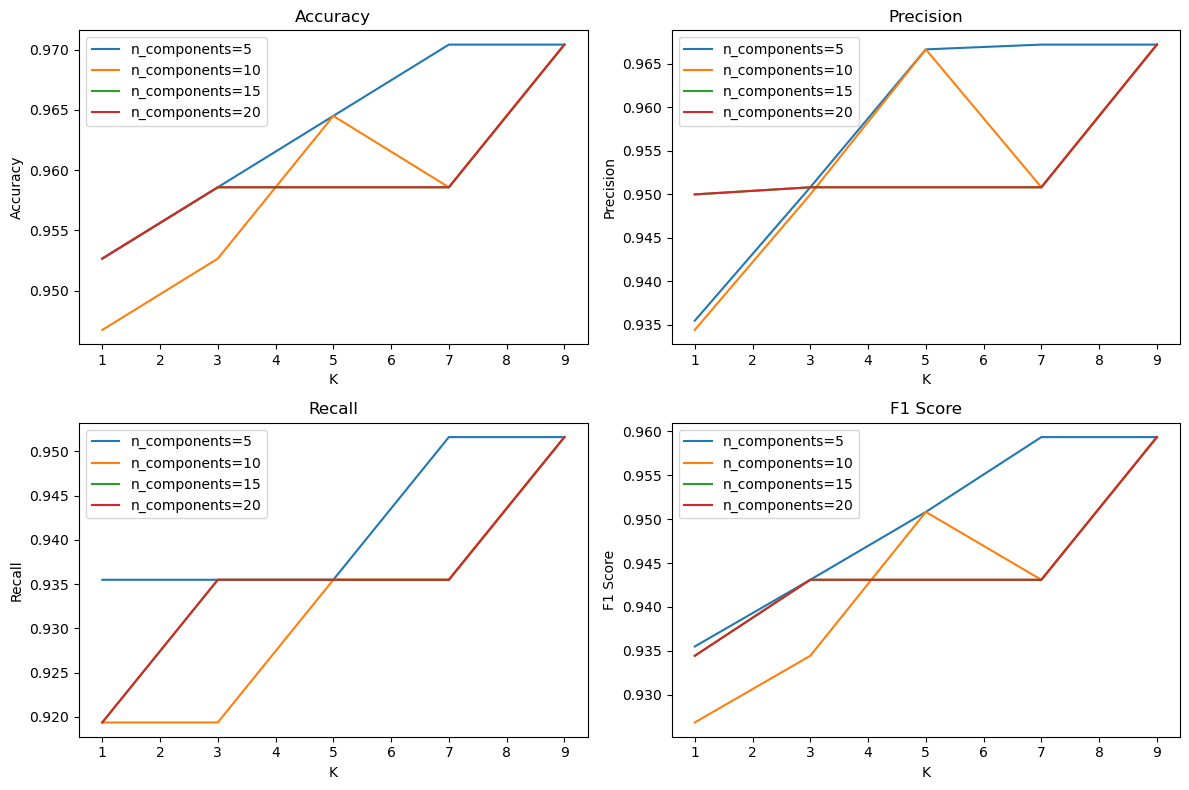

In [10]:
#Task 2: KNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

k_values = [1, 3, 5, 7, 9]  # Values of K for KNN
n_components = [5, 10, 15, 20]  # Values of n_components for PCA

# Initialize lists to store evaluation results for each component
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Iterate over different n_components values
for n in n_components:
    # Apply PCA to the training and testing data
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Initialize lists to store evaluation results for the current feature dimension
    acc_component = []
    prec_component = []
    recall_component = []
    f1_component = []

    # Iterate over different K values
    for k in k_values:
        # Initialize KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)

        # Train the KNN classifier using the PCA-transformed training data
        knn.fit(X_train_pca, y_train)

        # Predict the target values for the testing set
        y_pred = knn.predict(X_test_pca)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label='M')
        recall = recall_score(y_test, y_pred, pos_label='M')
        f1 = f1_score(y_test, y_pred, pos_label='M')

        # Append evaluation results to respective lists for the current component
        acc_component.append(accuracy)
        prec_component.append(precision)
        recall_component.append(recall)
        f1_component.append(f1)
        
        print(f"Component={n}, K={k}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1 Score={f1:.4f}")
        
    # Append evaluation results for the current component to the overall lists
    accuracies.append(acc_component)
    precisions.append(prec_component)
    recalls.append(recall_component)
    f1_scores.append(f1_component)
    
    # Print evaluation metrics for the current component and K value


# Plot the evaluation results
plt.figure(figsize=(12, 8))

# Plot Accuracy for each component
plt.subplot(2, 2, 1)
for i, n in enumerate(n_components):
    plt.plot(k_values, accuracies[i], label=f'n_components={n}')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

# Plot Precision for each component
plt.subplot(2, 2, 2)
for i, n in enumerate(n_components):
    plt.plot(k_values, precisions[i], label=f'n_components={n}')
plt.xlabel('K')
plt.ylabel('Precision')
plt.title('Precision')
plt.legend()

# Plot Recall for each component
plt.subplot(2, 2, 3)
for i, n in enumerate(n_components):
    plt.plot(k_values, recalls[i], label=f'n_components={n}')
plt.xlabel('K')
plt.ylabel('Recall')
plt.title('Recall')
plt.legend()

# Plot F1 Score for each component
plt.subplot(2, 2, 4)
for i, n in enumerate(n_components):
    plt.plot(k_values, f1_scores[i], label=f'n_components={n}')
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.title('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()





It is worth noting that the result for 15 components and 20 components are exactly the same.

## Task3: MLP

In [11]:
# Task 3: MLP (default use 5 features)
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Choose the feature dimension that gave the best performance in Task 2
n_components = 5

# Apply PCA to the data
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Split the dataset into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.297, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Perform grid search with 5-fold cross validation
mlp = MLPClassifier(random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_

# Train MLP with the best hyperparameters on the entire training set
mlp = MLPClassifier(random_state=42, **best_params)
mlp.fit(X_train_pca, y_train)

# Evaluate MLP on the test set
y_test_pred = mlp.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Print the evaluation results
print("Evaluation Results for MLP Classifier:")
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Evaluation Results for MLP Classifier:
Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.001}
Accuracy: 0.9290
Precision: 0.9060
Recall: 0.9907
F1 Score: 0.9464


## Task four: Comparision of two models
### Performace
Error Rate, Precision, Recall, and F1 Score
The performance of the KNN model varies with different values of K and the number of components. As seen from the results, the all score generally improves with an increase in the number of components and a decrease in K, but it is worth noting that it can reach the highest score at K=9 no matter the number of components. This phenomenon also works for all four criteria. As we are in the senario of identifying cancer cases, I think Recall is more important than other criteria, because it is more important to identify all the cancer cases than mistakenly report a normal person as a cancer case. It is surprising to find that the F1 score could be achieved higher using less k number at lower number of components, with the highest recall rate is 0.9516.

We utilized the 5-fold cross validation method to find the best parameters of MLP model. With the reason I have stated, I used 'recall' as the scoring method in GridSearchCV. We find the best parameters of MLP model are {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.001}, and under this setting, we can achieve the highest recall rate of 1.00.

In comparision, under the perspective of performance, KNN performs better for Accuracy and Precision, but worse for Recall and F1 score. 

### computational complexity(time)
We first make a estimation of computing complexity by analysis. All models are in default setting.

#### PCA
PCA: The time complexity of PCA depends on the number of samples (n), the number of features (d), and the number of components to keep (k). The dominant part of PCA is the computation of the covariance matrix, which takes O(nd^2) time. The singular value decomposition (SVD) step takes O(kd^2) time. Therefore, the overall time complexity of PCA is approximately O(nd^2 + kd^2)

KNN: The time complexity of KNN depends on the number of training samples (n_train), the number of testing samples (n_test), the number of features (d), and the number of neighbors (k). The training phase has a time complexity of O(n_train * d), as it involves storing the training samples. The prediction phase has a time complexity of O(n_test * n_train * d), as it requires computing the distances between each test sample and every training sample. The overall time complexity of KNN is therefore approximately O(n_test * n_train * d).


Evaluation Metrics: Computing evaluation metrics such as accuracy, precision, recall, and F1 score takes O(n_test) time, as it involves comparing the predicted labels with the ground truth labels.

After applying PCA and reducing the dimensionality of the dataset to n_components, the value of d is n_components. For KNN model, Considering the nested loops in the code, the total time complexity can be approximated as:
Expression 1： O(n_components * (n*n_components^2 + k*n_components^2 + n_test * n_train * n_components + n_test))

#### MLP
PCA: SAME

GridSearchCV: The time complexity of GridSearchCV is proportional to the product of the number of hyperparameter combinations, the number of cross-validation folds (k), and the time complexity of the base estimator. In this case, the base estimator is MLPClassifier, whose time complexity is O(h * n^2 * (d + 1) + c * n^2), where h is the number of hidden layers, n is the number of training samples, d is the number of features, and c is the number of output classes. Therefore, the overall time complexity of GridSearchCV is O(k * num_hyperparams * h * n^2 * (d + 1) + k * num_hyperparams * c * n^2).

MLPClassifier: The time complexity of MLPClassifier is 
Expression 2：O(h * n^2 * (d + 1) + c * n^2), where h is the number of hidden layers, n is the number of training samples, d is the number of features, and c is the number of output classes.

Evaluation Metrics: SAME

Therefore, the overall time complexity of the given MLP code can be approximated as:
O(n * n_components^2 + k * num_hyperparams * h * n^2 * (n_components + 1) + k * num_hyperparams * c * n^2 + h * n^2 * (n_components + 1) + c * n^2 + n_test)

In Expression 1, the dominant term is n * n_components^3 since it has the highest exponent of n_components.

In Expression 2, the dominant term is k * num_hyperparams * h * n^2 * (n_components + 1) since it has the highest exponent of n.

Comparing these dominant terms, we can see that the size of Expression 2 is generally larger than Expression 1 if k, num_hyperparams, h, and n are significant values.

As an empherical analysis, it usually take this KNN model about 15 seconds for training on this dataset. For the MLP, it is about 180s. In general, MLP is more complex than KNN, so it takes more time to train.

### Level of Overfitting


Component=5, K=1: Train_Accuracy=1.0000,Test_Accuracy=0.9527, Train_Recall=1.0000,Test_Accuracy=0.9527
Component=5, K=3: Train_Accuracy=0.9800,Test_Accuracy=0.9586, Train_Recall=0.9880,Test_Accuracy=0.9586
Component=5, K=5: Train_Accuracy=0.9775,Test_Accuracy=0.9645, Train_Recall=0.9880,Test_Accuracy=0.9645
Component=5, K=7: Train_Accuracy=0.9675,Test_Accuracy=0.9704, Train_Recall=0.9880,Test_Accuracy=0.9704
Component=5, K=9: Train_Accuracy=0.9625,Test_Accuracy=0.9704, Train_Recall=0.9880,Test_Accuracy=0.9704
Component=10, K=1: Train_Accuracy=1.0000,Test_Accuracy=0.9467, Train_Recall=1.0000,Test_Accuracy=0.9467
Component=10, K=3: Train_Accuracy=0.9850,Test_Accuracy=0.9527, Train_Recall=0.9960,Test_Accuracy=0.9527
Component=10, K=5: Train_Accuracy=0.9750,Test_Accuracy=0.9645, Train_Recall=0.9960,Test_Accuracy=0.9645
Component=10, K=7: Train_Accuracy=0.9625,Test_Accuracy=0.9586, Train_Recall=0.9880,Test_Accuracy=0.9586
Component=10, K=9: Train_Accuracy=0.9700,Test_Accuracy=0.9704, Train_

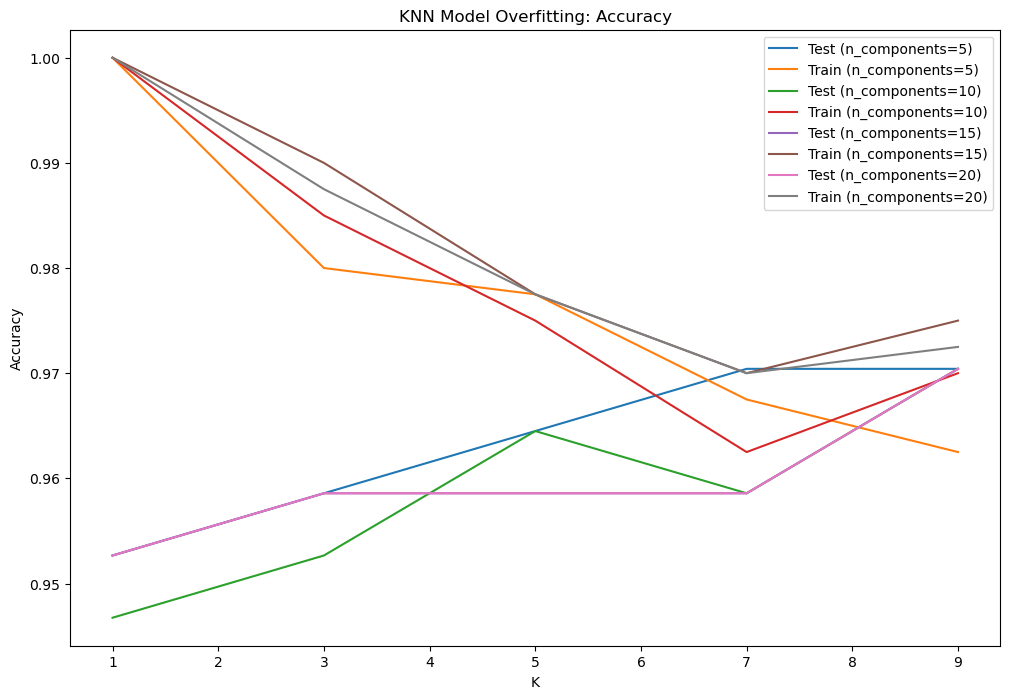

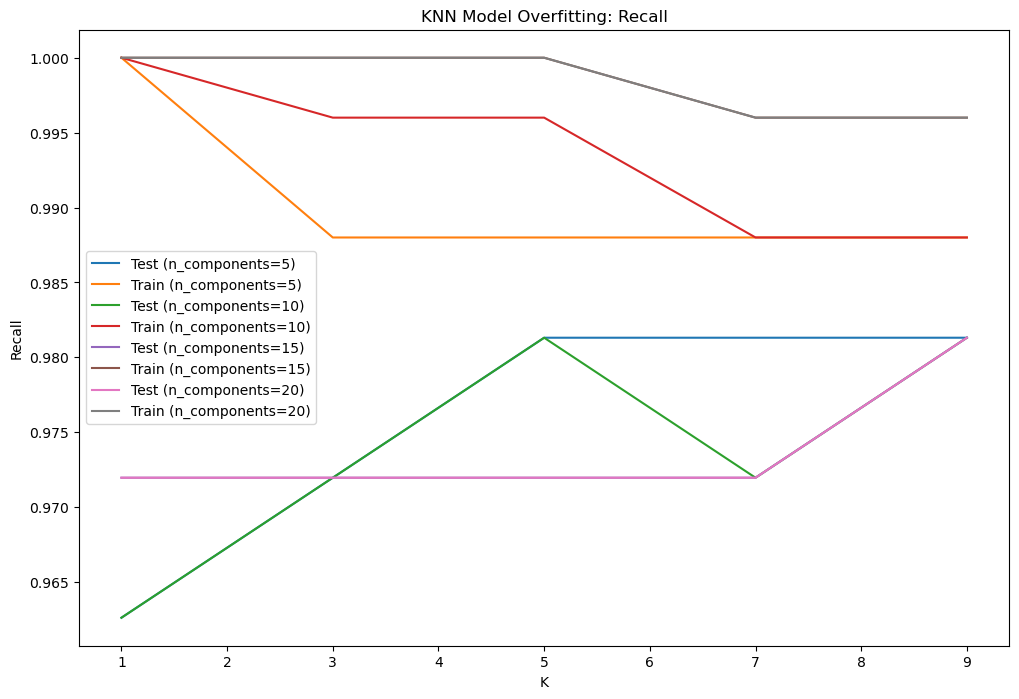

In [12]:
# Compare Level of Overfitting
#For kNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

# Assuming you have loaded and preprocessed your dataset, and split it into X_train, X_test, y_train, y_test

k_values = [1, 3, 5, 7, 9]  # Values of K for KNN
n_components = [5,10,15,20]  # Values of n_components for PCA

# Initialize lists to store evaluation results for each component
accuracies = []
recalls = []

for n in n_components:
    # Apply PCA to the training and testing data
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Initialize lists to store evaluation results for the current feature dimension
    acc_component = []
    recall_component = []

    # Iterate over different K values
    for k in k_values:
        # Initialize KNN classifier
        knn = KNeighborsClassifier(n_neighbors=k)

        # Train the KNN classifier using the PCA-transformed training data
        knn.fit(X_train_pca, y_train)

        # Predict the target values for the training set
        y_train_pred = knn.predict(X_train_pca)

        # Predict the target values for the testing set
        y_test_pred = knn.predict(X_test_pca)

        # Evaluate the model
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_recall = recall_score(y_train, y_train_pred)
        test_recall = recall_score(y_test, y_test_pred)

        # Append evaluation results to respective lists for the current component
        acc_component.append((train_accuracy, test_accuracy))
        recall_component.append((train_recall, test_recall))
        print(f"Component={n}, K={k}: Train_Accuracy={train_accuracy:.4f},Test_Accuracy={test_accuracy:.4f}, Train_Recall={train_recall:.4f},Test_Accuracy={test_accuracy:.4f}")

    # Append evaluation results for the current component to the overall lists
    accuracies.append(acc_component)
    recalls.append(recall_component)
 
    
# Plot the evaluation results
plt.figure(figsize=(12, 8))

# Plot accuracy results
for i, n in enumerate(n_components):
    test_accuracies = [acc[1] for acc in accuracies[i]]
    train_accuracies = [acc[0] for acc in accuracies[i]]
    plt.plot(k_values, test_accuracies, label=f"Test (n_components={n})")
    plt.plot(k_values, train_accuracies, label=f"Train (n_components={n})")

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN Model Overfitting: Accuracy')
plt.legend()
plt.show()

# Plot recall results
plt.figure(figsize=(12, 8))

for i, n in enumerate(n_components):
    test_recalls = [acc[1] for acc in recalls[i]]
    train_recalls = [acc[0] for acc in recalls[i]]
    plt.plot(k_values, test_recalls, label=f"Test (n_components={n})")
    plt.plot(k_values, train_recalls, label=f"Train (n_components={n})")

plt.xlabel('K')
plt.ylabel('Recall')
plt.title('KNN Model Overfitting: Recall')
plt.legend()
plt.show()

#### Analysis of overfitting of KNN model:
The most apparant feature is that all train model has full score on Accuracy and Recall for K = 1, and it is at lower k number that we face overfitting. The reason of this might be that when K is small the model may become too complex and start to overfit the training data (fit noise in training data). Overfitting occurs when the model learns the noise or random fluctuations in the training data, resulting in poor generalization to unseen data. As K increases, the model becomes less prone to overfitting, but it may also lose some discriminatory power on the training set.

With the increase of K, performance on train set steadly getting worse, this may because that as we increase the value of K, the model becomes more biased because it considers a larger number of neighbors for classification. This increased bias can lead to a decrease in accuracy on the train set. The performaces on two set are about the same at k=7 no matter the number of components.

In [13]:
from sklearn.decomposition import PCA

# Define the number of components for PCA
n_components = [5]

# Apply PCA to the training data
for n in n_components:
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    
    # Print the variance explained by each principal component
    print(f"Explained variance ratio (n_components={n}):")
    print(pca.explained_variance_ratio_)
    
    # Apply the same transformation to the testing data
    X_test_pca = pca.transform(X_test)

Explained variance ratio (n_components=5):
[0.43076465 0.19888237 0.09699835 0.06527064 0.05329384]


In [14]:
# Overfitting of MLP (default n_components equals 15)

# Evaluate MLP on the test set
y_test_pred = mlp.predict(X_test_pca)
y_train_pred = mlp.predict(X_train_pca)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)


# Print the evaluation results
print("Evaluation Overfitting for MLP Classifier:")
print(f"Best Hyperparameters: {best_params}")
print(f"test_Accuracy: {test_accuracy:.4f}")
print(f"train_Accuracy: {train_accuracy:.4f}")
print(f"test_Recall: {test_recall:.4f}")
print(f"train_ecall: {train_recall:.4f}")



Evaluation Overfitting for MLP Classifier:
Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.001}
test_Accuracy: 0.7929
train_Accuracy: 0.7825
test_Recall: 1.0000
train_ecall: 0.9960


#### Analysis of overfitting of MLP model:
Under the experiment we have done, their is no sign of overfitting in MLP model.

## 7. Further Explore
According to the competition on Kaggle, following models are recommended to be used:
|#| Algorithm | Parameters |  ||  | New Parameters 
|-|--------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|-|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|1| [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) | loss = `deviance`| |
|||learning_rate = 0.1||||learning_rate = 0.01, 1
|||n_estimators=500||
|||max_depth=3||||max_depth=1
|||max_features='log2'||
|2| [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) | n_estimators=500| |||n_estimators=1000
|||max_features=0.25||
|||criterion='entropy'||
|3| [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) | C=0.01| |||C=1, 10
|||gamma=0.1||
|||kernel="poly"||||kernel='linear','rbf'
|||degree=3||
|||coef0=10.0||
|4| [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) | n_estimators=1000| |
|||max_features='log2'||||max_features=0.25
|||criterion='entropy'|
|5| [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) | C=1.5| |||C=0.001,0.01,0.1,1,10,100,1000
|||penalty='l1'|
|||fit_intercept=True|
|6| [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) | ||||hidden_layer_sizes=100| |
|||||||activation='relu','tanh','logistic'|
|||||||learning_rate='constant','invscaling','adaptive'| 

We will construct and compare those models using GridSearchCV.

## GridSearch CV

In [15]:
def print_results(Olson_params,results,name,filename_pr):
    with open(filename_pr, mode='w') as file_object:
        print(name,file=file_object)
        print(name)
        print('BEST PARAMS: {}\n'.format(results.best_params_),file=file_object)
        print('Olson PARAMS: {}\n'.format(Olson_params),file=file_object)
        print('BEST PARAMS: {}\n'.format(results.best_params_))
        print('Olson PARAMS: {}\n'.format(Olson_params))
        means = results.cv_results_['mean_test_score']
        stds = results.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, results.cv_results_['params']):
            print('{} {} (+/-{}) for {}'.format(name,round(mean, 3), round(std * 2, 3), params),file=file_object)
            print('{} {} (+/-{}) for {}'.format(name,round(mean, 3), round(std * 2, 3), params))

In [16]:
print(GridSearchCV)

<class 'sklearn.model_selection._search.GridSearchCV'>


## Gradient Boosting

In [17]:
print(GradientBoostingClassifier())

GradientBoostingClassifier()


In [18]:
# Make Directory
path=folder_path(OUTPUT_path+'/Models/GB')
path_Olson=folder_path(OUTPUT_path+'/Models/GB_Olson')

Creation of the directory c:\Users\张泰源\Desktop\学习\大四数学\ml\CW 2023\Taiyuan Zhang_CW_ML_20318174/Outputs/Models/GB failed
Creation of the directory c:\Users\张泰源\Desktop\学习\大四数学\ml\CW 2023\Taiyuan Zhang_CW_ML_20318174/Outputs/Models/GB_Olson failed


In [19]:
GB_Olson_model_dir=os.path.join(path_Olson,'GB_Olson_model.pkl')
GB_model_dir=os.path.join(path,'GB_model.pkl')
if os.path.exists(GB_model_dir) == False:
    Olson_gb_parameters = {
            'learning_rate': [0.1],
            'loss': ['exponential', 'log_loss'],
            'max_depth': [3], 
            'max_features': ['log2'],
            'n_estimators': [500],            
            }
    gb_Olson = GradientBoostingClassifier() 
    gb_Olson=GridSearchCV(gb_Olson,Olson_gb_parameters,cv=10)
    gb_Olson.fit(X_train,y_train.ravel())
    gb_Olson.best_estimator_
    joblib.dump(gb_Olson.best_estimator_,GB_Olson_model_dir)
    
    gb = GradientBoostingClassifier()   
    parameters = {
            'loss': ['exponential', 'log_loss'],
            'learning_rate': [0.01, 0.1, 1],
            'n_estimators': [500],
            'max_depth': [1,3],
            'max_features': ['log2']
            }
    cv=GridSearchCV(gb, parameters, cv=10)
    cv.fit(X_train, y_train.ravel())
    print_results(Olson_gb_parameters,cv,'Gradient Boost (GB)',os.path.join(path,'GR_GridSearchCV_results.txt'))
    cv.best_estimator_
    joblib.dump(cv.best_estimator_,GB_model_dir)
else:
    print('Already have GB') 

Already have GB


## Random Forest

In [20]:
# Make Directory
path=folder_path(OUTPUT_path+'/Models/RF')
path_Olson=folder_path(OUTPUT_path+'/Models/RF_Olson')

Creation of the directory c:\Users\张泰源\Desktop\学习\大四数学\ml\CW 2023\Taiyuan Zhang_CW_ML_20318174/Outputs/Models/RF failed
Creation of the directory c:\Users\张泰源\Desktop\学习\大四数学\ml\CW 2023\Taiyuan Zhang_CW_ML_20318174/Outputs/Models/RF_Olson failed


In [21]:
RF_Olson_model_dir=os.path.join(path_Olson,'RF_Olson_model.pkl')
RF_model_dir=os.path.join(path,'RF_model.pkl')
if os.path.exists(RF_model_dir) == False:

    Olson_rf_parameters = {
            'criterion': ['entropy'],
            'max_features': [0.25],
            'n_estimators': [500]
            }   
    rf_Olson = RandomForestClassifier(oob_score = True) 
    rf_Olson=GridSearchCV(rf_Olson,Olson_rf_parameters,cv=10)
    rf_Olson.fit(X_train,y_train.ravel())
    rf_Olson.best_estimator_
    joblib.dump(rf_Olson.best_estimator_,RF_Olson_model_dir)
    
    rf = RandomForestClassifier(oob_score = True)    
    parameters = {
            'criterion': ['entropy','gini'],
            'max_features': [0.25],
            'n_estimators': [500,1000]
            }
    cv = GridSearchCV(rf, parameters, cv=10)
    cv.fit(X_train, y_train.ravel())
    print_results(Olson_rf_parameters,cv,'Random Forest (RF)',os.path.join(path,'RF_GridSearchCV_results.txt'))
    cv.best_estimator_
    joblib.dump(cv.best_estimator_,RF_model_dir)
else:
    print('Already have RF')

Already have RF


## SVM

In [22]:
# Make Directory
path=folder_path(OUTPUT_path+'/Models/SVM')
path_Olson=folder_path(OUTPUT_path+'/Models/SVM_Olson')

Creation of the directory c:\Users\张泰源\Desktop\学习\大四数学\ml\CW 2023\Taiyuan Zhang_CW_ML_20318174/Outputs/Models/SVM failed
Creation of the directory c:\Users\张泰源\Desktop\学习\大四数学\ml\CW 2023\Taiyuan Zhang_CW_ML_20318174/Outputs/Models/SVM_Olson failed


In [23]:
SVM_Olson_model_dir=os.path.join(path_Olson,'SVM_Olson_model.pkl')
SVM_model_dir=os.path.join(path,'SVM_model.pkl')
if os.path.exists(SVM_model_dir) == False:
    Olson_svc_parameters = {
            'C': [0.01],
            'coef0': [10.0], 
            'degree': [3],
            'gamma': [0.1],
            'kernel': ['poly'],                  
            }
    svc_Olson = SVC(probability = True)  
    svc_Olson=GridSearchCV(svc_Olson,Olson_svc_parameters,cv=10)
    svc_Olson.fit(X_train,y_train.ravel())
    svc_Olson.best_estimator_
    joblib.dump(svc_Olson.best_estimator_,SVM_Olson_model_dir)
    
    svc = SVC(probability = True)    
    parameters = {
            'C': [0.01, 1, 10],
            'coef0': [10.0],
            'degree': [3],
            'gamma': [0.1],
            'kernel': ['poly','linear','rbf'],
            }
    cv=GridSearchCV(svc,parameters, cv=10)
    cv.fit(X_train, y_train.ravel())
    print_results(Olson_svc_parameters,cv,'Support Vector Machine (SVM)',os.path.join(path,'SVM_GridSearchCV_results.txt'))
    cv.best_estimator_
    joblib.dump(cv.best_estimator_,SVM_model_dir)
else:
    print('Already have SVM')

Already have SVM


## Extra RF

In [24]:
# Make Directory
path=folder_path(OUTPUT_path+'/Models/ETC')
path_Olson=folder_path(OUTPUT_path+'/Models/ETC_Olson')

Creation of the directory c:\Users\张泰源\Desktop\学习\大四数学\ml\CW 2023\Taiyuan Zhang_CW_ML_20318174/Outputs/Models/ETC failed
Creation of the directory c:\Users\张泰源\Desktop\学习\大四数学\ml\CW 2023\Taiyuan Zhang_CW_ML_20318174/Outputs/Models/ETC_Olson failed


In [25]:
ETC_Olson_model_dir=os.path.join(path_Olson,'ETC_Olson_model.pkl')
ETC_model_dir=os.path.join(path,'ETC_model.pkl')
if os.path.exists(ETC_model_dir) == False:

    Olson_etc_parameters = {
            'criterion': ['entropy'],
            'max_features': ['log2'],
            'n_estimators': [1000]
            }
    etc_Olson = ExtraTreesClassifier(oob_score=True,bootstrap=True) 
    etc_Olson=GridSearchCV(etc_Olson,Olson_etc_parameters,cv=10)
    etc_Olson.fit(X_train,y_train.ravel())
    etc_Olson.best_estimator_
    joblib.dump(etc_Olson.best_estimator_,ETC_Olson_model_dir)
    
    etc = ExtraTreesClassifier(oob_score=True,bootstrap=True)    
    parameters = {
            'criterion': ['entropy'],
            'max_features': ['log2',0.25],
            'n_estimators': [1000]
            }
    cv=GridSearchCV(etc, parameters, cv=10)
    cv.fit(X_train, y_train.ravel())
    print_results(Olson_etc_parameters,cv,'Extra Trees Classifier (ETC)',os.path.join(path,'ETC_GridSearchCV_results.txt'))
    cv.best_estimator_
    joblib.dump(cv.best_estimator_,ETC_model_dir)
else:
    print('Already have ETC')  

Already have ETC


## Logistic Regression

In [26]:
# Make Directory
path=folder_path(OUTPUT_path+'/Models/LR')
path_Olson=folder_path(OUTPUT_path+'/Models/LR_Olson')

Creation of the directory c:\Users\张泰源\Desktop\学习\大四数学\ml\CW 2023\Taiyuan Zhang_CW_ML_20318174/Outputs/Models/LR failed
Creation of the directory c:\Users\张泰源\Desktop\学习\大四数学\ml\CW 2023\Taiyuan Zhang_CW_ML_20318174/Outputs/Models/LR_Olson failed


In [27]:
LR_Olson_model_dir=os.path.join(path_Olson,'LR_Olson_model.pkl')
LR_model_dir=os.path.join(path,'LR_model.pkl')
if os.path.exists(LR_model_dir) == False:    
    Olson_lr_parameters = {
            'C': [1.5],
            'fit_intercept':[True],
            'penalty': ['l1']
            }
    lr_Olson = LogisticRegression(solver='liblinear')
    lr_Olson=GridSearchCV(lr_Olson,Olson_lr_parameters,cv=10)
    lr_Olson.fit(X_train,y_train.ravel())
    lr_Olson.best_estimator_
    joblib.dump(lr_Olson.best_estimator_,LR_Olson_model_dir)
    
    lr = LogisticRegression(solver='liblinear')
    parameters = {
            'C': [0.001, 0.01, 0.1, 1, 1.5, 10, 100, 1000],
            'fit_intercept':[True],
            'penalty': ['l1']
            }
    cv=GridSearchCV(lr, parameters, cv=10)
    cv.fit(X_train, y_train.ravel())
    print_results(Olson_lr_parameters,cv,'Logistic Regression (LR)',os.path.join(path,'LR_GridSearchCV_results.txt'))
    cv.best_estimator_
    joblib.dump(cv.best_estimator_,LR_model_dir)
else:
    print('Already have LR')

Already have LR


## Multilayer Perceptron

In [28]:
# Make Directory
path=folder_path(OUTPUT_path+'/Models/MLP')
path_Olson=folder_path(OUTPUT_path+'/Models/MLP_Olson')

Creation of the directory c:\Users\张泰源\Desktop\学习\大四数学\ml\CW 2023\Taiyuan Zhang_CW_ML_20318174/Outputs/Models/MLP failed
Creation of the directory c:\Users\张泰源\Desktop\学习\大四数学\ml\CW 2023\Taiyuan Zhang_CW_ML_20318174/Outputs/Models/MLP_Olson failed


In [29]:
MLP_Olson_model_dir=os.path.join(path_Olson,'MLP_Olson_model.pkl')
MLP_model_dir=os.path.join(path,'MLP_model.pkl')
if os.path.exists(MLP_model_dir) == False:
    Olson_mlp_parameters = {
            }
    mlp_Olson = MLPClassifier()
    mlp_Olson=GridSearchCV(mlp_Olson,Olson_mlp_parameters,cv=10)
    mlp_Olson.fit(X_train,y_train.ravel())
    mlp_Olson.best_estimator_
    joblib.dump(mlp_Olson.best_estimator_,MLP_Olson_model_dir)
    
    mlp = MLPClassifier()
    parameters = {
            'hidden_layer_sizes': [(10,),(50,),(100,)],
            'activation': ['relu','tanh','logistic'],
            'learning_rate': ['constant','invscaling','adaptive']
            }
    cv=GridSearchCV(mlp, parameters, cv=10)
    cv.fit(X_train, y_train.ravel())
    print_results(Olson_mlp_parameters,cv,'Neural Network (MLP)',os.path.join(path,'MLP_GridSearchCV_results.txt'))
    cv.best_estimator_
    joblib.dump(cv.best_estimator_,MLP_model_dir)
else:
    print('Already have MLP')

Already have MLP


## 8. Evaluation Models 

In [30]:
## all models
models = {}

for mdl in ['GB', 'GB_Olson',
            'RF','RF_Olson', 
            'SVM','SVM_Olson',
            'ETC','ETC_Olson',
            'LR','LR_Olson',
            'MLP','MLP_Olson']:
    model_path=os.path.join(OUTPUT_path,'Models/{}/{}_model.pkl')
    models[mdl] = joblib.load(model_path.format(mdl,mdl))

In [49]:
Class_num = {'B': 'benign', 'M': 'malignant'}
df['diagnosis'] = df['Class'].replace(Class_num)


In [54]:
diagnosis_num={'B':0,'M':1}
data['diagnosis']=data['diagnosis'].map(diagnosis_num)

In [63]:
import numpy as np
X_test = X_test[~np.isnan(X_test).any(axis=1)]
X_train = X_train[~np.isnan(X_train).any(axis=1)]



### Function: evaluate_model

In [64]:
def evaluate_model(fig_path,name, model, features, labels, y_test_ev, fc):
        CM_fig=os.path.join(fig_path,'Figure{}.A_{}_Confusion_Matrix.png'.format(fc,name))
        VI_fig=os.path.join(fig_path,'Figure{}.B_{}_Variable_Importance_Plot.png'.format(fc,name))
        
        start = time()
        pred = model.predict(features)
        end = time()
        y_truth=y_test_ev
        accuracy = round(accuracy_score(labels, pred), 3)
        precision = round(precision_score(labels, pred), 3)
        recall = round(recall_score(labels, pred), 3)
        print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                       accuracy,
                                                                                       precision,
                                                                                       recall,
                                                                                       round((end - start)*1000, 1)))
        
        
        pred=pd.DataFrame(pred)
        pred.columns=['diagnosis']
        # Convert Diagnosis for Cancer from Binary to Categorical
        diagnosis_name={0:'Benign',1:'Malginant'}
        y_truth['diagnosis']=y_truth['diagnosis'].map(diagnosis_name)
        pred['diagnosis']=pred['diagnosis'].map(diagnosis_name)
        class_names = ['Benign','Malginant']        
        cm = confusion_matrix(y_test_ev, pred, class_names)
        
        FP_L='False Positive [Didnt actually have cancer]'
        FP = cm[0][1]
        FN_L='False Negative [Actually has cancer!]'
        FN = cm[1][0]
        TP_L='True Positive'
        TP = cm[1][1]
        TN_L='True Negative'
        TN = cm[0][0]

        #TPR_L= 'Sensitivity, hit rate, recall, or true positive rate'
        TPR_L= 'Sensitivity'
        TPR = round(TP/(TP+FN),3)
        #TNR_L= 'Specificity or true negative rate'
        TNR_L= 'Specificity'
        TNR = round(TN/(TN+FP),3) 
        #PPV_L= 'Precision or positive predictive value'
        PPV_L= 'Precision'
        PPV = round(TP/(TP+FP),3)
        #NPV_L= 'Negative predictive value'
        NPV_L= 'NPV'
        NPV = round(TN/(TN+FN),3)
        #FPR_L= 'Fall out or false positive rate'
        FPR_L= 'FPR'
        FPR = round(FP/(FP+TN),3)
        #FNR_L= 'False negative rate'
        FNR_L= 'FNR'
        FNR = round(FN/(TP+FN),3)
        #FDR_L= 'False discovery rate'
        FDR_L= 'FDR'
        FDR = round(FP/(TP+FP),3)

        ACC_L= 'Accuracy'
        ACC = round((TP+TN)/(TP+FP+FN+TN),3)
        
        stats_data = {'Name':name,
                     ACC_L:ACC,
                     FP_L:FP,
                     FN_L:FN,
                     TP_L:TP,
                     TN_L:TN,
                     TPR_L:TPR,
                     TNR_L:TNR,
                     PPV_L:PPV,
                     NPV_L:NPV,
                     FPR_L:FPR,
                     FNR_L:FDR}
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm,cmap=plt.cm.gray_r)
        plt.title('Figure {}.A: {} Confusion Matrix on Unseen Test Data'.format(fc,name),y=1.08)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        # Loop over data dimensions and create text annotations.
        for i in range(len(class_names)):
            for j in range(len(class_names)):
                text = ax.text(j, i, cm[i, j],
                               ha="center", va="center", color="r")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.savefig(CM_fig,dpi=400,bbox_inches='tight')
        #plt.show()
        
        if  name == 'RF' or name == 'RF_Olson' or name == 'GB' or name == 'GB_Olson' or name == 'ETC' or name == 'ETC_Olson': 
            # Get numerical feature importances
            importances = list(model.feature_importances_)
            importances=100*(importances/max(importances))               
            feature_list = list(features.columns)
            sorted_ID=np.argsort(importances)   
            plt.figure(figsize=[10,10])
            plt.barh(sort_list(feature_list,importances),importances[sorted_ID],align='center')
            plt.title('Figure {}.B: {} Variable Importance Plot'.format(fc,name))
            plt.xlabel('Relative Importance')
            plt.ylabel('Feature') 
            plt.savefig(VI_fig,dpi=300,bbox_inches='tight')
            #plt.show()
        
        return accuracy,name, model, stats_data
        



In [65]:
def sort_list(list1, list2): 
        zipped_pairs = zip(list2, list1)   
        z = [x for _, x in sorted(zipped_pairs)]       
        return z 

### Searching best model using testing features

In [66]:
def plot_roc_cur(fper, tper,mdl_i,ax): 
    roc_auc=str(round(auc(fper,tper),3))
    label_i='ROC-'+mdl_i+'  (AUC = '+roc_auc+')'
    auc
    ax.plot(fper, tper,label=label_i)
    ax.set_xlabel('False Positive Rate', size=15, labelpad=20)
    ax.set_ylabel('True Positive Rate', size=15, labelpad=20)
    ax.set_xlim([-0.05,1.05])
    ax.set_ylim([-0.05,1.05])

ValueError: Found array with 0 sample(s) (shape=(0, 31)) while a minimum of 1 is required by GradientBoostingClassifier.

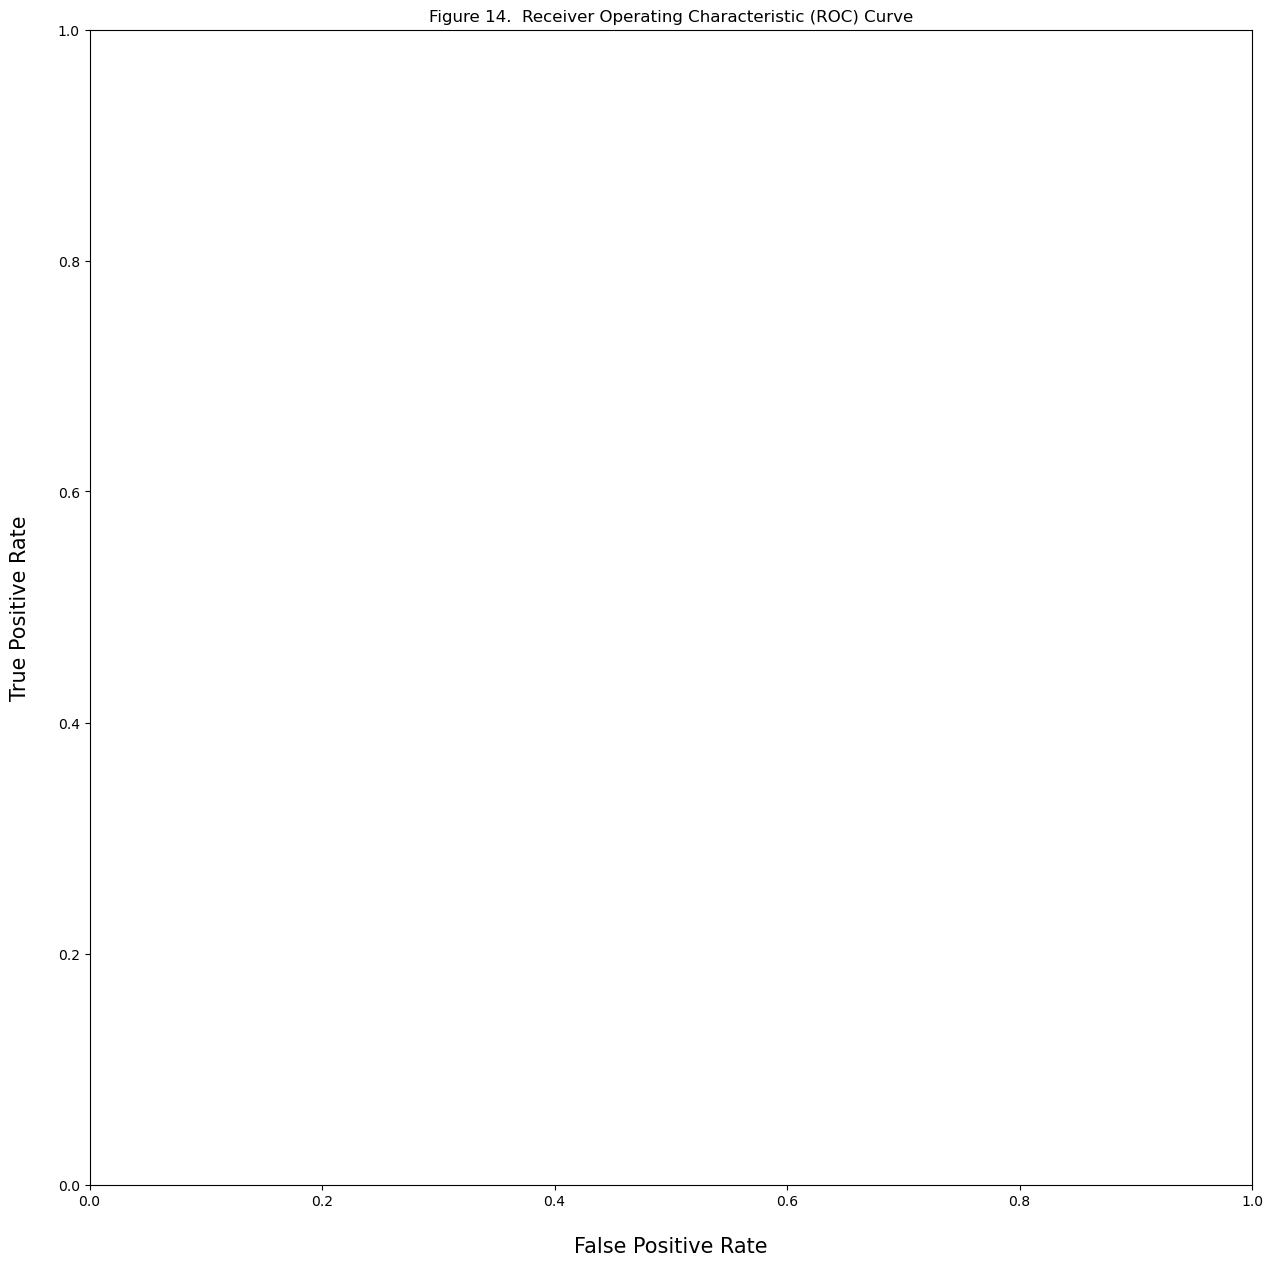

In [68]:
ev_accuracy=[None]*len(models)
ev_name=[None]*len(models)
ev_model=[None]*len(models)
ev_stats=[None]*len(models)
count=1
f, ax2 = plt.subplots(figsize=(15,15))
plt.title('Figure 14.  Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate',size=15,labelpad=20)
plt.ylabel('True Positive Rate',size=15,labelpad=20)
for name, mdl in models.items():
        y_test_ev=y_test
        fper,tper,thresholds = [],[],[]
        ev_accuracy[count-1],ev_name[count-1],ev_model[count-1], ev_stats[count-1] = evaluate_model(figures_path,
                                                                                                    name,
                                                                                                    mdl,
                                                                                                    X_test,
                                                                                                    y_test,
                                                                                                    y_test_ev,
                                                                                                    count+1)
        diagnosis_name={'Benign':0,'Malginant':1}
        y_test['diagnosis']=y_test['diagnosis'].map(diagnosis_name)
        y_pred=pd.DataFrame(mdl.predict_proba(pd.DataFrame(X_test))[:,1])
        fper,tper,thresholds = roc_curve(y_test,y_pred)
        plot_disp = plot_roc_cur(fper,tper,name,ax=ax2)
            
        count=count+1        
ax2.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='Coin Flip (AUC = 0.5)')
ax2.legend()
f.savefig(os.path.join(figures_path,'Figure14.png'),dpi=300,bbox_inches='tight')

In [ ]:
best_name=ev_name[ev_accuracy.index(max(ev_accuracy))]    #picks the maximum accuracy
print('Best Model:',best_name,'with Accuracy of ',max(ev_accuracy))   
best_model=ev_model[ev_accuracy.index(max(ev_accuracy))]    #picks the maximum accuracy

if best_name == 'RF' or best_name == 'GB' or best_name == 'ETC': 
    # Get numerical feature importances
    importances = list(best_model.feature_importances_)
    importances=100*(importances/max(importances))               
    feature_list = list(X.columns)
    sorted_ID=np.argsort(importances)   
    plt.figure(figsize=[10,10])
    plt.barh(sort_list(feature_list,importances),importances[sorted_ID],align='center')
    plt.title('Figure 8:  Variable Importance Plot -- {}'.format(best_name))
    plt.xlabel('Relative Importance')
    plt.ylabel('Feature') 
    plt.savefig(os.path.join(figures_path,'Figure8.png'),dpi=300,bbox_inches='tight')
    plt.show()

TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

## 9. Reference
### 9.1 Wisconsin Diagnostic Breast Cancer (WDBC) dataset
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

